In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import collections as mc

from sklearn.linear_model import LinearRegression, Ridge

import pandas

In [3]:
x = np.random.uniform(size=10)
y = np.sin(2*np.pi*x) + np.random.normal(scale=0.3, size=10)

Sine dataset from appendix A with standard deviation highlighted.

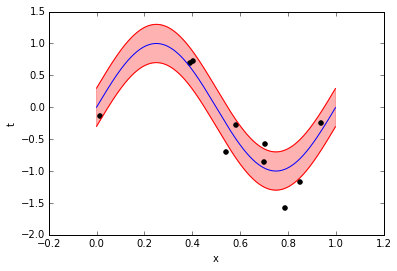

In [4]:
g = np.arange(0, 1, 0.001)
u = np.sin(2*np.pi*g) + 0.3
l = np.sin(2*np.pi*g) - 0.3
plt.plot(g, u, color='red')
plt.plot(g, l, color='red')
plt.fill_between(g, u, l, color='red', alpha=0.3)
plt.plot(g, np.sin(2*np.pi*g))
plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('t')

Bishop fig. 1.3 error function, ie. displacement between $t_n$ and $y(x_n, \mathbf{w})$.

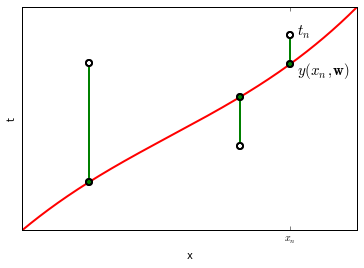

In [5]:
def our_f(x):
    return 0.5*x - 0.4*x**2 + 0.3*x**3

plt.plot(g, our_f(g), color='red', lw=2)
plt.xlabel('x')
plt.ylabel('t')

frame = plt.gca()
frame.get_yaxis().set_ticks([])
frame.get_xaxis().set_ticks([0.8])
frame.get_xaxis().set_ticklabels([r'$x_n$'])

plt.plot([.2, .65, .8], [.3, .15, .35], 'ro', color='white', mew=2)
plt.plot([.2, .65, .8], [our_f(.2), our_f(.65), our_f(.8)], 'ro', color='green', mew=2)
lc = mc.LineCollection([[(.2, our_f(.2)), (.2, .3)], [(.65, .15), (.65, our_f(.65))], [(.8, .35), (.8, our_f(.8))]],
                       colors='green', linewidths=2)
ax = plt.axes()
ax.add_collection(lc)
ax.text(.8 + .02, our_f(.8) - .02, r'$y(x_n, \mathbf{w})$', fontsize=15)
ax.text(.8 + .02, .35, r'$t_n$', fontsize=15)

Bishop fig. 1.4. Various polynomial fits.

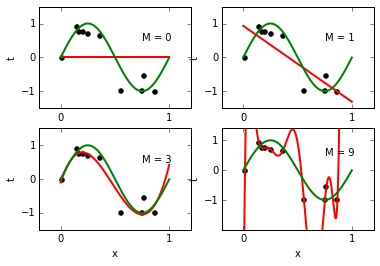

In [226]:
def poly_expand(x, m):
    new_x = np.zeros((len(x), m+1))
    
    for i, x_i in enumerate(x):
        for j in xrange(m+1):
            new_x[i, j] = x_i**j
            
    return new_x

models = []
m = 9

for i in xrange(m+1):
    model = LinearRegression(fit_intercept=False)
    model.fit(poly_expand(x, i), y)
    models.append(model)
    
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(x, y, color='black')
ax1.plot(g, poly_expand(g, 0).dot(models[0].coef_), color='red', lw=2)
ax1.plot(g, np.sin(2*np.pi*g), color='green', lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_xticks([0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.text(.75, .5, 'M = 0', fontsize=10)

ax2.scatter(x, y, color='black')
ax2.plot(g, poly_expand(g, 1).dot(models[1].coef_), color='red', lw=2)
ax2.plot(g, np.sin(2*np.pi*g), color='green', lw=2)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_xticks([0, 1])
ax2.set_yticks([-1, 0, 1])
ax2.text(.75, .5, 'M = 1', fontsize=10)

ax3.scatter(x, y, color='black')
ax3.plot(g, poly_expand(g, 3).dot(models[3].coef_), color='red', lw=2)
ax3.plot(g, np.sin(2*np.pi*g), color='green', lw=2)
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_xticks([0, 1])
ax3.set_yticks([-1, 0, 1])
ax3.text(.75, .5, 'M = 3', fontsize=10)

ax4.scatter(x, y, color='black')
ax4.plot(g, poly_expand(g, 9).dot(models[9].coef_), color='red', lw=2)
ax4.plot(g, np.sin(2*np.pi*g), color='green', lw=2)
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_xticks([0, 1])
ax4.set_yticks([-1, 0, 1])
ax4.set_ylim([-2, 1.4])
ax4.text(.75, .5, 'M = 9', fontsize=10)


Bishop Fig. 1.4 various polynomial fits-

In [7]:
x_test = np.random.uniform(size=10)
y_test = np.sin(2*np.pi*x_test) + np.random.normal(scale=0.3, size=10)

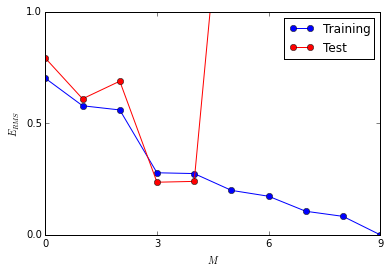

In [8]:
train_error = np.zeros(m+1)
test_error = np.zeros(m+1)

for i in xrange(m+1):
    model = models[i]
    
    p_train = model.predict(poly_expand(x, i))
    e_train = np.sqrt(np.sum((y - p_train)**2)/len(y))
    train_error[i] = e_train
    
    p_test = model.predict(poly_expand(x_test, i))
    e_test = np.sqrt(np.sum((y_test - p_test)**2)/len(y_test))
    test_error[i] = e_test

h1 = plt.plot(range(m+1), train_error, 'b', label='Training', marker='o')
h2 = plt.plot(range(m+1), test_error, 'r', label='Test', marker='o')
plt.ylim([0, 1])
plt.xticks([0, 3, 6, 9])
plt.yticks([0, .5, 1])
plt.legend()
plt.xlabel(r'$M$')
plt.ylabel(r'$E_{RMS}$')

Bishop Fig. 1.5 training and test set error.

In [9]:
pandas.set_option('precision', 3)
indices = [r'$w_0^*$', r'$w_1^*$', r'$w_2^*$', r'$w_3^*$', r'$w_4^*$', r'$w_5^*$', r'$w_6^*$', r'$w_7^*$', r'$w_8^*$', r'$w_9^*$']


pandas.DataFrame({'M = 0': pandas.Series(models[0].coef_, index=indices[0:1]),
                  'M = 1': pandas.Series(models[1].coef_, index=indices[0:2]),
                  'M = 3': pandas.Series(models[3].coef_, index=indices[0:4]),
                  'M = 9': pandas.Series(models[9].coef_, index=indices)}).fillna('')

,M = 0,M = 1,M = 3,M = 9
$w_0^*$,-0.417,0.495,-0.351,5.82e+03
$w_1^*$,,-1.54,15.1,-4.71e+05
$w_2^*$,,,-43,5.75e+06
$w_3^*$,,,28.6,-3.23e+07
$w_4^*$,,,,1.04e+08
$w_5^*$,,,,-2.08e+08
$w_6^*$,,,,2.64e+08
$w_7^*$,,,,-2.06e+08
$w_8^*$,,,,9.14e+07
$w_9^*$,,,,-1.75e+07


Bishop Table 1.1 Polynomial model coefficients.

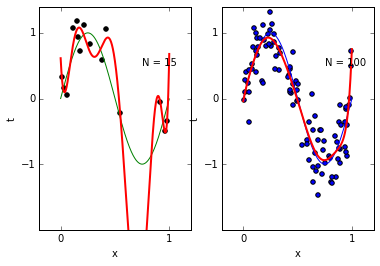

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

N = 15

x = np.random.uniform(size=N)
y = np.sin(2*np.pi*x) + np.random.normal(scale=0.3, size=N)
g = np.arange(0, 1, 0.001)

ax1.scatter(x, y, marker='o', c='black')
ax1.plot(g, np.sin(2*np.pi*g), c='green')
model = LinearRegression(fit_intercept=False)
model.fit(poly_expand(x, 9), y)
ax1.plot(g, poly_expand(g, 9).dot(model.coef_), color='red', lw=2)
ax1.set_ylim([-2, 1.4])
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_xticks([0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.text(.75, .5, 'N = 15', fontsize=10)

N = 100

x = np.random.uniform(size=N)
y = np.sin(2*np.pi*x) + np.random.normal(scale=0.3, size=N)
ax2.scatter(x, y, marker='o')
ax2.plot(g, np.sin(2*np.pi*g))
model = LinearRegression(fit_intercept=False)
model.fit(poly_expand(x, 9), y)
ax2.plot(g, poly_expand(g, 9).dot(model.coef_), color='red', lw=2)
ax2.set_ylim([-2, 1.4])
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_xticks([0, 1])
ax2.set_yticks([-1, 0, 1])
ax2.text(.75, .5, 'N = 100', fontsize=10)

Bishop Fig. 1.6 larger data set reduce overfitting.

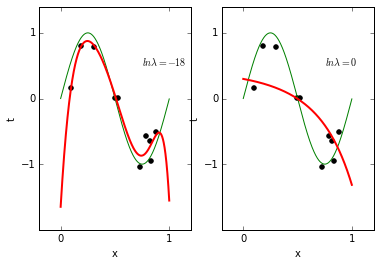

In [11]:
x = np.random.uniform(size=10)
y = np.sin(2*np.pi*x) + np.random.normal(scale=0.3, size=10)

xp = poly_expand(x, 9)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(x, y, marker='o', c='black')
ax1.plot(g, np.sin(2*np.pi*g), c='green')

coef_18 = np.linalg.inv(xp.transpose().dot(xp) + (np.e**(-18.))*np.identity(10)).dot(xp.transpose()).dot(y)

ax1.plot(g, poly_expand(g, 9).dot(coef_18), color='red', lw=2)
ax1.set_ylim([-2, 1.4])
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_xticks([0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.text(.75, .5, r'$ln \lambda = -18$', fontsize=10)

ax2.scatter(x, y, marker='o', c='black')
ax2.plot(g, np.sin(2*np.pi*g), c='green')

coef_0 = np.linalg.inv(xp.transpose().dot(xp) + (np.e**0)*np.identity(10)).dot(xp.transpose()).dot(y)

ax2.plot(g, poly_expand(g, 9).dot(coef_0), color='red', lw=2)
ax2.set_ylim([-2, 1.4])
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_xticks([0, 1])
ax2.set_yticks([-1, 0, 1])
ax2.text(.75, .5, r'$ln \lambda = 0$', fontsize=10)

Bishop Fig. 1.7 Regularized error function.

In [12]:
coef_inf = np.linalg.inv(xp.transpose().dot(xp)).dot(xp.transpose()).dot(y)

pandas.set_option('precision', 3)
indices = [r'$w_0^*$', r'$w_1^*$', r'$w_2^*$', r'$w_3^*$', r'$w_4^*$', r'$w_5^*$', r'$w_6^*$', r'$w_7^*$', r'$w_8^*$', r'$w_9^*$']

pandas.DataFrame({r'$\ln{\lambda} = -\infty$': pandas.Series(coef_inf, index=indices),
                  r'$\ln{\lambda} = -18$': pandas.Series(coef_18, index=indices),
                  r'$\ln{\lambda} = -0$': pandas.Series(coef_0, index=indices)},
                 columns=[r'$\ln{\lambda} = -\infty$', r'$\ln{\lambda} = -18$', r'$\ln{\lambda} = -0$'])

,$\ln{\lambda} = -\infty$,$\ln{\lambda} = -18$,$\ln{\lambda} = -0$
$w_0^*$,467.68,-1.65,0.30
$w_1^*$,-12855.12,27.78,-0.31
$w_2^*$,139231.09,-109.75,-0.36
$w_3^*$,-796427.54,192.83,-0.30
$w_4^*$,2697608.76,-135.94,-0.22
$w_5^*$,-5687786.17,-71.57,-0.16
$w_6^*$,7543736.19,101.25,-0.11
$w_7^*$,-6118166.18,73.34,-0.08
$w_8^*$,2770653.66,-65.34,-0.05
$w_9^*$,-536432.75,-12.53,-0.03


Bishop Table 1.2 Regularized coefficients.

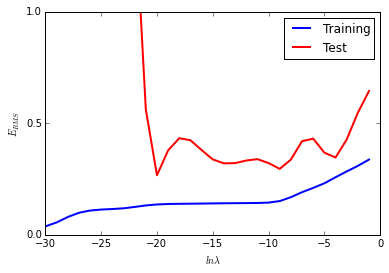

In [13]:
train_error = np.zeros(30)
test_error = np.zeros(30)

xp = poly_expand(x, 9)

for i, l in enumerate(range(-30, -0)):
    coefs = np.linalg.inv(xp.transpose().dot(xp) + (np.e**l)*np.identity(10)).dot(xp.transpose()).dot(y)
    p_train = xp.dot(coefs)
    e_train = np.sqrt(np.sum((y - p_train)**2)/len(y))
    train_error[i] = e_train
    
    p_test = poly_expand(x_test, 9).dot(coefs)
    e_test = np.sqrt(np.sum((y_test - p_test)**2)/len(y_test))
    test_error[i] = e_test

h1 = plt.plot(range(-30, 0), train_error, 'b', label='Training', lw=2)
h2 = plt.plot(range(-30, 0), test_error, 'r', label='Test', lw=2)
plt.ylim([0, 1])
plt.xticks([-30, -25, -20, -15, -10, -5, 0])
plt.yticks([0, .5, 1])
plt.legend()
plt.xlabel(r'$ln\lambda$')
plt.ylabel(r'$E_{RMS}$')

Bishop Fig. 1.8 Regularized training and test error.

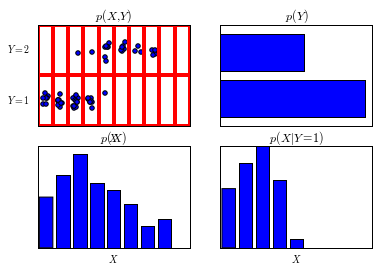

In [14]:
y = np.random.binomial(1, .5, 60) + 1
p = [.2, .6]
x = np.array([np.random.binomial(8, p[i - 1], 1)[0] for i in y]) + 1

xs = x + np.random.normal(0., .1, len(x)) - .5
ys = y + np.random.normal(0., .1, len(y))

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(xs, ys)
ax1.set_title(r"$p(X,Y)$")
ax1.set_yticks([])
ax1.set_xticks([])
ax1.text(-2, .95, r"$Y=1$")
ax1.text(-2, 1.95, r"$Y=2$")
ax1.set_xlabel(r"$X$")
[ax1.axvline(i, color='r', linestyle='solid', linewidth=4) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[ax1.axhline(i, color='r', linestyle='solid', linewidth=4) for i in [.5, 1.5, 2.5]]
ax1.set_ylim((.5, 2.5))
ax1.set_xlim((0, 10))

ax2.barh([1, 2], [np.sum(y==1), np.sum(y==2)])
ax2.set_ylim((.8, 3))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(r"$p(Y)$")

ax3.hist(x, bins=[.6, 1.4, 1.6, 2.4, 2.6, 3.4, 3.6, 4.4, 4.6, 5.4, 5.6, 
                  6.4, 6.6, 7.4, 7.6 ,8.4, 8.6, 9.4])
ax3.set_xlim((.5, 9.5))
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel(r"$X$")
ax3.set_title(r"$p(X)$")

ax4.hist(x[y==1], bins=[.6, 1.4, 1.6, 2.4, 2.6, 3.4, 3.6, 4.4, 4.6, 5.4, 5.6, 
                  6.4, 6.6, 7.4, 7.6 ,8.4, 8.6, 9.4])
ax4.set_xlim((.5, 9.5))
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xlabel(r"$X$")
ax4.set_title(r"$p(X|Y=1)$")

Bishop Fig. 1.11, joint and conditional distributions.

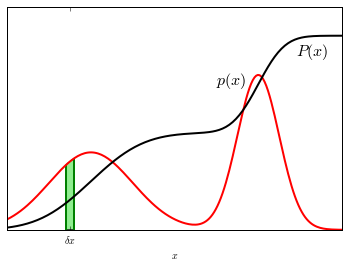

In [64]:
l = np.linspace(0, 4, 200)
plt.plot(l, sp.stats.norm.pdf(l, 1, .5) + sp.stats.norm.pdf(l, 3, .25), c = 'r', lw = 2)
plt.plot(l, sp.stats.norm.cdf(l, 1, .5) + sp.stats.norm.cdf(l, 3, .25), c = 'black', lw =2)
plt.xticks([.75], [r'$\delta x$'])
plt.yticks([])
plt.xlabel(r'$x$')
plt.text(2.5, 1.5, r'$p(x)$', fontsize=16)
plt.text(3.45, 1.8, r'$P(x)$', fontsize=16)
plt.ylim([0,2.3])
lc = mc.LineCollection([[(.7, 0), 
                         (.7, sp.stats.norm.pdf(.7, 1, .5) + sp.stats.norm.pdf(.7, 3, .25))],
                        [(.8, 0), 
                         (.8, sp.stats.norm.pdf(.8, 1, .5) + sp.stats.norm.pdf(.8, 3, .25))]],
                       colors='green', linewidths=2)
ax = plt.axes()
ax.add_collection(lc)
l = np.linspace(.7, .8, 20)
plt.fill_between(l, sp.stats.norm.pdf(l, 1, .5) + sp.stats.norm.pdf(l, 3, .25), 
                 facecolor = 'lightgreen')

Biship Fig. 1.12 Continous probability density.

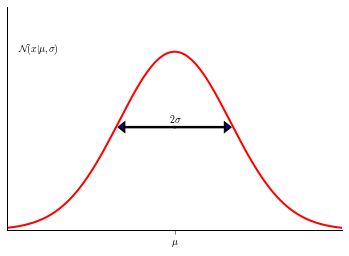

In [73]:
l = np.linspace(-3, 3, 300)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(l, sp.stats.norm.pdf(l), c = 'r', lw = 2)
ax.set_xticks([0])
ax.set_xticklabels([r'$\mu$'])
ax.set_yticks([])
ax.set_ylim(0, .5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
plt.arrow(0,.23,1,0,shape='full',lw=2, length_includes_head=True, fill=True, head_length=.1)
plt.arrow(0,.23,-1,0,shape='full',lw=2, length_includes_head=True, fill=True, head_length=.1)
ax.text(-.1, .24, r"$2\sigma$")
ax.text(-2.8, .4, r"$\mathcal{N}(x|\mu,\sigma)$")

Bishop Fig. 1.13 Univariate Gaussian.

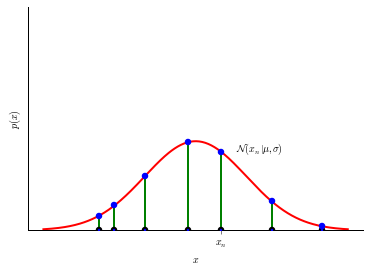

In [108]:
l = np.linspace(-3, 3, 300)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(l, sp.stats.norm.pdf(l), c = 'r', lw = 2, zorder = 1)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p(x)$")
ax.set_xticks([.5])
ax.set_xticklabels([r'$x_n$'])
ax.set_yticks([])
ax.set_ylim(0, 1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
ax.text(.8, .35, r"$\mathcal{N}(x_n|\mu,\sigma)$")

lc = mc.LineCollection([[(x, 0), (x, sp.stats.norm.pdf(x))] 
                        for x in [-1.9, -1.6, -1, -.15, .5, 1.5, 2.5]],
                       colors='green', linewidths=2, zorder = 2)
ax.add_collection(lc)

ax.scatter([-1.9, -1.6, -1, -.15, .5, 1.5, 2.5], [0, 0, 0, 0, 0, 0, 0], lw=2, zorder=3)
ax.scatter([-1.9, -1.6, -1, -.15, .5, 1.5, 2.5], 
           sp.stats.norm.pdf([-1.9, -1.6, -1, -.15, .5, 1.5, 2.5]),
           color = 'b', lw = 2, zorder = 3)


Bishop Fig. 1.14 Gaussian likelihood maximization.

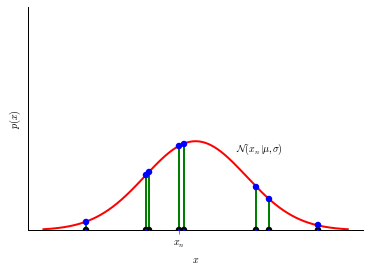

In [223]:
l = np.linspace(-3, 3, 300)
x = sp.stats.norm().rvs(8)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(l, sp.stats.norm.pdf(l), c = 'r', lw = 2, zorder = 1)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p(x)$")
ax.set_xticks([x[4]])
ax.set_xticklabels([r'$x_n$'])
ax.set_yticks([])
ax.set_ylim(0, 1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
ax.text(.8, .35, r"$\mathcal{N}(x_n|\mu,\sigma)$")

lc = mc.LineCollection([[(xi, 0), (xi, sp.stats.norm.pdf(xi))] for xi in x],
                       colors='green', linewidths=2, zorder = 2)
ax.add_collection(lc)

ax.scatter(x, np.zeros(8), lw=2, zorder=3)
ax.scatter(x, sp.stats.norm.pdf(x),
           color = 'b', lw = 2, zorder = 3)

Bishop Fig. 1.14 Gaussian likelihood maximization with a real sample.

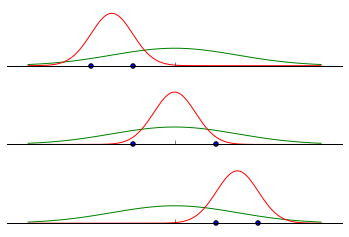

In [134]:
l = np.linspace(-7, 7, 700)
fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(l, sp.stats.norm.pdf(l, 0, 3), c = 'g')
ax.plot(l, sp.stats.norm.pdf(l, -3), c = 'r')
ax.scatter([-4, -2], [0, 0], c = 'b')
ax.set_ylim(-.05, .45)
ax.set_xticks([0])
ax.set_xticklabels([])
ax.set_yticks([])
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax = fig.add_subplot(312)
ax.plot(l, sp.stats.norm.pdf(l, 0, 3), c = 'g')
ax.plot(l, sp.stats.norm.pdf(l, 0), c = 'r')
ax.scatter([-2, 2], [0, 0], c = 'b')
ax.set_ylim(-.05, .45)
ax.set_xticks([0])
ax.set_xticklabels([])
ax.set_yticks([])
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax = fig.add_subplot(313)
ax.plot(l, sp.stats.norm.pdf(l, 0, 3), c = 'g')
ax.plot(l, sp.stats.norm.pdf(l, 3), c = 'r')
ax.scatter([2, 4], [0, 0], c = 'b')
ax.set_ylim(-.05, .45)
ax.set_xticks([0])
ax.set_xticklabels([])
ax.set_yticks([])
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

Bishop Fig. 1.15 Underestimation of variance.

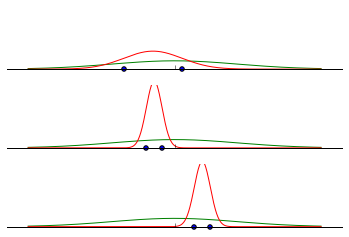

In [216]:
sample = sp.stats.norm(0, 3).rvs(6)
sample.shape = 2, 3

mu = np.mean(sample, axis=0)
sigma = np.std(sample, axis=0)
order = np.argsort(mu)

subplots = [311, 312, 313]

l = np.linspace(-7, 7, 700)
fig = plt.figure()

for i in order:
    idx = order[i]
    ax = fig.add_subplot(subplots[i])
    ax.plot(l, sp.stats.norm.pdf(l, 0, 3), c = 'g')
    ax.plot(l, sp.stats.norm.pdf(l, mu[idx], sigma[idx]), c = 'r')
    ax.scatter(sample[:, idx], [0, 0], c = 'b')
    ax.set_ylim(-.05, 1)
    ax.set_xticks([0])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')


Bishop Fig. 1.15 Underestimation of variance with real samples of the normal distribution.

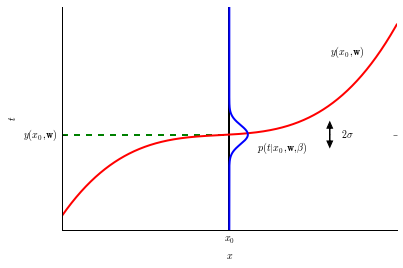

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111)

l = np.linspace(-3, 3, 700)
y = l**3 + .5*(l**2) + l
ax.plot(l, y, c = 'r', lw = 2, zorder = 2)

l = np.linspace(-3, 0, 100)
y = np.zeros(100)
ax.plot(l, y, '--', c = 'g', lw = 2, zorder = 1)

l = np.linspace(-30, 40, 700)
x = sp.stats.norm.pdf(l, 0, 3) * 2.5
ax.plot(x, l, c = 'b', lw = 2, zorder = 3)

x = np.zeros(700)
ax.plot(x, l, c = 'black', lw = 2, zorder = 1)

ax.set_xticks([0])
ax.set_xticklabels([r'$x_0$'])
ax.set_xlabel(r'$x$')
ax.set_yticks([0])
ax.set_yticklabels([r'$y(x_0,\mathbf{w})$'])
ax.set_ylabel(r'$t$')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax.text(1.8, 25, r"$y(x_0,\mathbf{w})$")
ax.text(0.5, -5, r'$p(t|x_0,\mathbf{w},\beta)$')

ax.arrow(1.8, 0, 0, 4, color = 'black', head_width=.1, head_length =2, length_includes_head=True)
ax.arrow(1.8, 0, 0, -4, color = 'black', head_width=.1, head_length =2, length_includes_head=True)
ax.text(2, -1, r'$2\sigma$')

Bishop Fig. 1.16 Gaussian conditional distribution for t given x.

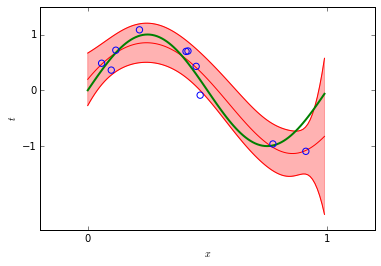

In [329]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.random.uniform(size=10)
y = np.sin(2*np.pi*x) + np.random.normal(scale=0.3, size=10)
g = np.arange(0, 1, 0.01)
plt.plot(g, np.sin(2*np.pi*g), color='green', lw=2, zorder=3)
plt.scatter(x, y, edgecolors='blue', facecolors='none', marker='o', s=40, zorder=4)

X = poly_expand(x, 9)
alpha = 5*10**-3
beta = 11.1
S_inv = alpha*np.identity(10) + beta*np.sum([np.outer(X[i], X[i]) for i in range(10)], axis=0)
S = np.linalg.inv(S_inv)

def mu(x):
    return beta*x.dot(S.dot(np.sum([y[i]*X[i] for i in range(10)], axis=0)))

def sigma(x):
    return (1./beta + x.dot(S).dot(x.T))

def pred(x):
    m = mu(x)
    s = sigma(x)
    
    return 
means = np.array([mu(poly_expand([i], 9))[0] for i in g])
variances = np.array([sqrt(sigma(poly_expand([i], 9))[0][0]) for i in g])
plt.plot(g, means, color='red')

plt.plot(g, means + variances, color='red')
plt.plot(g, means - variances, color='red')
plt.fill_between(g, means + variances, means - variances, color='red', alpha=0.3)

ax.set_xticks([0, 1])
ax.set_xlabel(r'$x$')
ax.set_yticks([-1, 0, 1])
ax.set_ylabel(r'$t$')

Bishop Fig. 1.16 predictive distribution of Bayesian curve fitting.

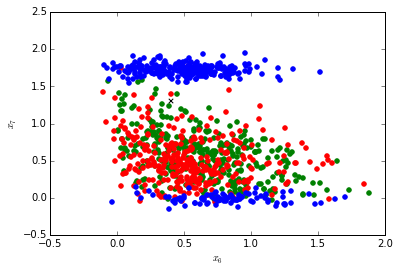

In [63]:
data = sp.io.loadmat('oilFlow3Class/oilFlow3Class.mat')

x_green = data['DataTrn'][data['DataTrnLbls'][:,0] == 1,5]
y_green = data['DataTrn'][data['DataTrnLbls'][:,0] == 1,6]
scatter(x_green, y_green, color='green')

x_red = data['DataTrn'][data['DataTrnLbls'][:,1] == 1,5]
y_red = data['DataTrn'][data['DataTrnLbls'][:,1] == 1,6]
scatter(x_red, y_red, color='red')

x_blue = data['DataTrn'][data['DataTrnLbls'][:,2] == 1,5]
y_blue = data['DataTrn'][data['DataTrnLbls'][:,2] == 1,6]
scatter(x_blue, y_blue, color='blue')

scatter([.4], [1.3], marker='x', color='black')

plt.xlabel(r'$x_6$')
plt.ylabel(r'$x_7$')

Bishop fig. 1.9 oil flow data scatterplot and prediction.

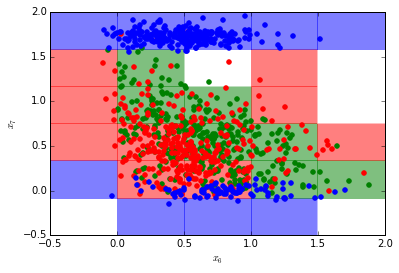

In [106]:
import matplotlib.colors

gridx = np.linspace(-.5, 2, 6)
gridy = np.linspace(-.5, 2, 7)

grid_green, _, _ = np.histogram2d(x_green, y_green, bins=[gridx, gridy])
grid_red, _, _ = np.histogram2d(x_red, y_red, bins=[gridx, gridy])
grid_blue, _, _ = np.histogram2d(x_blue, y_blue, bins=[gridx, gridy])

grid = np.zeros((5, 6))

for i in range(5):
    for  j in range(6):
        r = grid_red[i, j]
        g = grid_green[i, j]
        b = grid_blue[i, j]
        
        if r > b and r > g:
            grid[i, j] = 1
            
        if g > r and g > b:
            grid[i, j] = 2
        
        if b > r and b > g:
            grid[i, j] = 3
           
plt.figure()
plt.pcolormesh(gridx, gridy, grid.T, alpha=.5,
               cmap=matplotlib.colors.ListedColormap(['white', 'red', 'green', 'blue']))
plt.scatter(x_green, y_green, color='green')
plt.scatter(x_red, y_red, color='red')
plt.scatter(x_blue, y_blue, color='blue')
plt.xlim([-.5, 2])
plt.ylim([-.5, 2])
plt.xlabel(r'$x_6$')
plt.ylabel(r'$x_7$')
plt.show()

Bishop fig. 1.20 cell majority classifier.

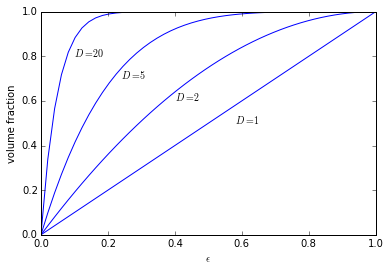

In [18]:
def vol_frac(eps, D):
    return 1 - (1 - eps)**D

eps = np.linspace(0, 1)
v1 = vol_frac(eps, 1)
v2 = vol_frac(eps, 2)
v5 = vol_frac(eps, 5)
v20 = vol_frac(eps, 20)

fig = plt.figure()
ax = fig.add_subplot(111)

plot(eps, v1, color='b')
plot(eps, v2, color='b')
plot(eps, v5, color='b')
plot(eps, v20, color='b')

plt.xlabel(r'$\epsilon$')
plt.ylabel(r'volume fraction')

ax.text(.58, .5, r'$D=1$')
ax.text(.4, .6, r'$D=2$')
ax.text(.24, .7, r'$D=5$')
ax.text(.1, .8, r'$D=20$')

Bishop Fig. 1.22 Fraction of volume of sphere lying in range $r = 1 - \epsilon$.

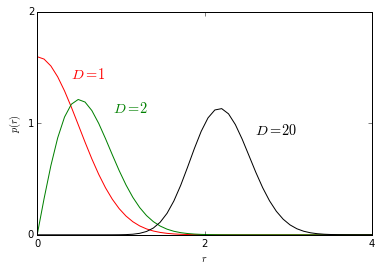

In [47]:
d = np.array([1, 2, 20])
s = (2 * np.pi**(d/2.))/sp.special.gamma(d/2.)
r = np.linspace(0, 4)
p_1 = (s[0]/np.sqrt(2*np.pi*.5**2))*np.exp(-(r**2)/(2.*.5**2))
p_2 = ((s[1]*r)/(2*np.pi*.5**2))*np.exp(-(r**2)/(2.*.5**2))
p_20 = ((s[2]*r**19)/((2*np.pi*.5**2)**10))*np.exp(-(r**2)/(2.*.5**2))

fig = plt.figure()
ax = fig.add_subplot(111)

plot(r, p_1, c='red')
plot(r, p_2, c='green')
plot(r, p_20, c='black')

ax.text(.4, 1.4, r'$D=1$', color='red', size='x-large')
ax.text(.9, 1.1, r'$D=2$', color='green', size='x-large')
ax.text(2.6, .9, r'$D=20$', color='black', size='x-large')
ax.set_xlim([0,4])
ax.set_xticks([0, 2, 4])
ax.set_xlabel(r'$r$')
ax.set_ylim([0, 2])
ax.set_yticks([0, 1, 2])
ax.set_ylabel(r'$p(r)$')

Bishop Fig. 1.23 Gaussian density with high D in polar coordinates with $\sigma=0,5$.

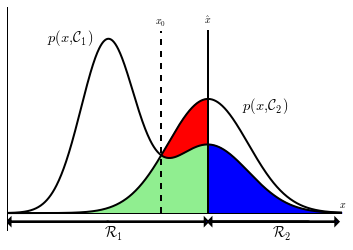

In [3]:
x = np.linspace(-6, 4, 700)
f1 = np.linspace(-6, 0)
y1 = sp.stats.norm.pdf(x, 0, 1.2)
y2 = sp.stats.norm.pdf(x, -3, .8) + .6 * sp.stats.norm.pdf(x, 0, 1.2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y1, c = 'black', lw = 2)
ax.plot(x, y2, c = 'black', lw = 2)

x_0 = x[np.argmin(np.abs(y1[100:600]-y2[100:600])) + 100]
l = np.linspace(0, .53)
ax.plot(np.zeros(50), l, c = 'black', lw = 2)
ax.plot(np.ones(50) * x_0, l, '--', c = 'black', lw = 2)

x_hat = x[len(np.argwhere(x < 0))]
ax.fill_between(x, 0, np.minimum(y2, y1), where = x < 0, color = 'lightgreen')
ax.fill_between(x, 0, np.minimum(y2, y1), where = x > 0, color = 'blue')
ax.fill_between(x, y2, y1, where = np.logical_and(y2 < y1, x < 0), color = 'red')
ax.set_xlim((-6, 4))
ax.set_ylim((-.05, .6))
ax.plot(x, np.zeros(700), color='black')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.text(-4.8, .5, r'$p(x, \mathcal{C}_1)$', size='x-large')
ax.text(1, .3, r'$p(x, \mathcal{C}_2)$', size='x-large')
ax.text(x_0 - .2, .55, r'$x_0$')
ax.text(x_hat - .125, .55, r'$\hat{x}$')

plt.arrow(0,-.025,3.9,0,shape='full',lw=2, length_includes_head=True, 
          fill=True, head_length=.1)
plt.arrow(3,-.025,-3,0,shape='full',lw=2, length_includes_head=True, fill=True, head_length=.1)
ax.text(1.9, -.07, r'$\mathcal{R}_2$', size='x-large')

plt.arrow(-3,-.025,3,0,shape='full',lw=2, length_includes_head=True, 
          fill=True, head_length=.1)
plt.arrow(-3,-.025,-3,0,shape='full',lw=2, length_includes_head=True, fill=True, head_length=.1)
ax.text(-3.1, -.07, r'$\mathcal{R}_1$', size='x-large')

ax.text(3.9, .015, r'$x$')

Bish Fig. 1.24 Optimal error regions.

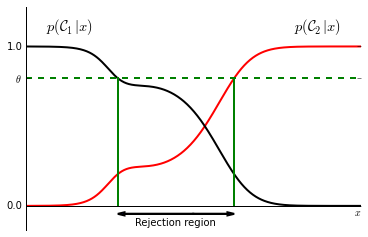

In [79]:
x = np.linspace(-2.5, 2.5, 700)
y1 = sp.stats.norm.pdf(x, 2)
y2 = .9 * sp.stats.norm.pdf(x, -4) + .1 * sp.stats.norm.pdf(x, 0, .5)
c_y1 = y1 / (y1 + y2)
c_y2 = y2 / (y1 + y2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, c_y1, c = 'red', lw = 2)
ax.plot(x, c_y2, c = 'black', lw = 2)

theta = .8
r1 = x[np.max(np.argwhere(c_y2 > theta))]
r2 = x[np.min(np.argwhere(c_y1 > theta))]
ax.plot(x, np.ones(len(x)) * theta, '--', c= 'green', lw = 2)
ax.plot(r1 * np.ones(50), np.linspace(0, theta), c = 'green', lw = 2)
ax.plot(r2 * np.ones(50), np.linspace(0, theta), c = 'green', lw = 2)
ax.set_xlim((-2.5, 2.5))
ax.set_ylim((-.15, 1.25))
ax.set_yticks([0, theta, 1])
ax.set_yticklabels([r'0.0', r'$\theta$', r'1.0'])
ax.set_xticks([])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.plot(x, np.zeros(len(x)), color='black')

plt.arrow(0,-.05,r1,0,shape='full',lw=2, length_includes_head=True, 
          fill=True, head_length=.1)
plt.arrow(0,-.05,r2,0,shape='full',lw=2, length_includes_head=True, 
          fill=True, head_length=.1)
ax.text(r1+.25, -.12, r'Rejection region', size='medium')
ax.text(-2.2, 1.1, r'$p(\mathcal{C}_1 | x)$', size='x-large')
ax.text(1.5, 1.1, r'$p(\mathcal{C}_2 | x)$', size='x-large')
ax.text(2.4, -.06, r'$x$', size='medium')

Bishop Fig. 1.26 Rejection option.